**데이터 불러오기**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **기타**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False ## 마이나스 '-' 표시 제대로 출력
from scipy.stats import t
from statsmodels.formula.api import ols

In [3]:
!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 8, 'font.family': 'NanumGothic'})

Selecting previously unselected package fonts-nanum.
(Reading database ... 121671 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


# **데이터 전처리**

In [4]:
import pandas as pd

# 경제활동 인구
coin = pd.read_csv('/content/drive/MyDrive/공모전 2024/예측모델/성별_경제활동인구_총괄_월별.csv', encoding='cp949')
# 소비자물가지수
consumer = pd.read_csv('/content/drive/MyDrive/공모전 2024/예측모델/소비자물가지수_2020100__20240119013956.csv', encoding='cp949')
#출생,사망,혼인,이혼율
all = pd.read_csv('/content/drive/MyDrive/공모전 2024/예측모델/출생, 사망, 혼인, 이혼 월별.csv', encoding='cp949')

- **coin 데이터 전처리**

In [5]:
coin = coin[['시점', '계.1', '계.2', '계.3', '계.4', '계.5', '계.6', '계.7']]
coin.columns = coin.iloc[0]
coin = coin[1:].reset_index(drop=True)
coin

,시점,경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%)
0,2000.01,"21,442","20,210","1,232","14,536",59.6,5.7,56.2
1,2000.02,"21,458","20,235","1,224","14,553",59.6,5.7,56.2
2,2000.03,"21,810","20,696","1,113","14,234",60.5,5.1,57.4
3,2000.04,"22,104","21,115",989,"13,977",61.3,4.5,58.5
4,2000.05,"22,337","21,420",917,"13,790",61.8,4.1,59.3
...,...,...,...,...,...,...,...,...
271,2022.08,"29,025","28,410",615,"16,246",64.1,2.1,62.8
272,2022.09,"29,093","28,389",704,"16,191",64.2,2.4,62.7
273,2022.10,"29,110","28,418",692,"16,192",64.3,2.4,62.7
274,2022.11,"29,087","28,421",666,"16,231",64.2,2.3,62.7


In [6]:
coin = coin.rename(columns={'경제활동인구 (천명)':'경제활동인구',	'취업자 (천명)':'취업자',	'실업자 (천명)': '실업자',	'비경제활동인구 (천명)':'비경제활동인구',	'경제활동참가율 (%)':'경제활동참가율',	'실업률 (%)':'실업률', '고용률 (%)':'고용률'})

coin

,시점,경제활동인구,취업자,실업자,비경제활동인구,경제활동참가율,실업률,고용률
0,2000.01,"21,442","20,210","1,232","14,536",59.6,5.7,56.2
1,2000.02,"21,458","20,235","1,224","14,553",59.6,5.7,56.2
2,2000.03,"21,810","20,696","1,113","14,234",60.5,5.1,57.4
3,2000.04,"22,104","21,115",989,"13,977",61.3,4.5,58.5
4,2000.05,"22,337","21,420",917,"13,790",61.8,4.1,59.3
...,...,...,...,...,...,...,...,...
271,2022.08,"29,025","28,410",615,"16,246",64.1,2.1,62.8
272,2022.09,"29,093","28,389",704,"16,191",64.2,2.4,62.7
273,2022.10,"29,110","28,418",692,"16,192",64.3,2.4,62.7
274,2022.11,"29,087","28,421",666,"16,231",64.2,2.3,62.7


- 경제활동인구, 취업자, 실업자, 비경제 활동인구, 경제활동참가율, 실업률, 고용률 데이터

In [7]:
coin['시점'] = pd.to_datetime(coin['시점'], format='%Y.%m')

coin = coin.set_index('시점')

coin

,경제활동인구,취업자,실업자,비경제활동인구,경제활동참가율,실업률,고용률
시점,,,,,,,
2000-01-01,"21,442","20,210","1,232","14,536",59.6,5.7,56.2
2000-02-01,"21,458","20,235","1,224","14,553",59.6,5.7,56.2
2000-03-01,"21,810","20,696","1,113","14,234",60.5,5.1,57.4
2000-04-01,"22,104","21,115",989,"13,977",61.3,4.5,58.5
2000-05-01,"22,337","21,420",917,"13,790",61.8,4.1,59.3
...,...,...,...,...,...,...,...
2022-08-01,"29,025","28,410",615,"16,246",64.1,2.1,62.8
2022-09-01,"29,093","28,389",704,"16,191",64.2,2.4,62.7
2022-10-01,"29,110","28,418",692,"16,192",64.3,2.4,62.7


- **소비자물가지수 데이터 전처리(consumer)**

In [8]:
consumer['시점'] = pd.to_datetime(consumer['시점'].astype(str), format='%Y.%m', errors='coerce')
consumer = consumer.rename(columns={'전국': '소비자물가지수'})

consumer['시점'] = pd.to_datetime(consumer['시점'])
start_date = '2000-01-01'
consumer = consumer[consumer['시점'] >= start_date]

consumer = consumer.set_index('시점')

In [9]:
consumer

,소비자물가지수
시점,
2000-01-01,62.456
2000-02-01,62.647
2000-03-01,62.962
2000-04-01,62.709
2000-05-01,62.393
...,...
2022-08-01,108.630
2022-09-01,108.820
2022-01-01,109.160


- **all 데이터 전처리**

In [10]:
all.columns = all.iloc[0]
all = all[1:].reset_index(drop=True)

In [11]:
all['시점'] = pd.to_datetime(all['시점'].str.extract('(\d+\.\d+)')[0], format='%Y.%m', errors='coerce')

- 출생아 수

In [12]:
baby = all[(all['종류별']=='출생아수(명)') & (all['행정구역별']=='전국')]
baby = baby[['시점', '출생,사망,혼인,이혼']]
baby = baby.rename(columns={'출생,사망,혼인,이혼':'출생아수'})

baby['시점'] = pd.to_datetime(baby['시점'])
start_date = '2000-01-01'
baby = baby[baby['시점'] >= start_date]

baby = baby.set_index('시점')

- 사망자 수

In [13]:
die = all[(all['종류별']=='사망자수(명)') & (all['행정구역별']=='전국')]
die = die[['시점', '출생,사망,혼인,이혼']]
die = die.rename(columns={'출생,사망,혼인,이혼':'사망자수'})

die['시점'] = pd.to_datetime(die['시점'])
start_date = '2000-01-01'
die = die[die['시점'] >= start_date]

die = die.set_index('시점')

- 혼인 수

In [14]:
marry = all[(all['종류별']=='혼인건수(건)') & (all['행정구역별']=='전국')]
marry = marry[['시점', '출생,사망,혼인,이혼']]
marry = marry.rename(columns={'출생,사망,혼인,이혼':'혼인건수(건)'})

marry['시점'] = pd.to_datetime(marry['시점'])
start_date = '2000-01-01'
marry = marry[marry['시점'] >= start_date]

marry = marry.set_index('시점')

- 이혼 수

In [15]:
divorce = all[(all['종류별']=='이혼건수(건)') & (all['행정구역별']=='전국')]
divorce = divorce[['시점', '출생,사망,혼인,이혼']]
divorce = divorce.rename(columns={'출생,사망,혼인,이혼':'이혼건수(건)'})

divorce['시점'] = pd.to_datetime(divorce['시점'])
start_date = '2000-01-01'
divorce = divorce[divorce['시점'] >= start_date]

divorce = divorce.set_index('시점')


**전처리 후 데이터 프레임 및 열칼럼**
1. coin 경제활동인구데이터
- 시점(경제활동 인구 데이터 조사한 시점)
- 경제활동인구
- 취업자
- 실업자
- 비경제 활동인구
- 경제활동참가율
- 실업률
- 고용률

2. consumer 소비자 물가지수
- 시점(소비자 물가지수 측정 시점)
- 소비자물가지수

3. hiltered_all 출생사망혼인 이혼
- 출생아 : baby -> 시점 + 출생아 수
- 사망자 die -> 시점 + 사망자 수
- 혼인수 marry -> 시점 + 혼인수
- 이혼수 divorce -> 시점 + 이혼수


In [16]:
combined_df = pd.merge(baby, consumer,  on='시점', how='inner')
for df in [die, marry, divorce, coin]:
    combined_df = pd.merge(combined_df, df, on='시점', how='inner')

# 결과 확인
multi = pd.DataFrame(combined_df)
multi

,출생아수,소비자물가지수,사망자수,혼인건수(건),이혼건수(건),경제활동인구,취업자,실업자,비경제활동인구,경제활동참가율,실업률,고용률
시점,,,,,,,,,,,,
2000-01-01,61644,62.456,24457,30120,9045,"21,442","20,210","1,232","14,536",59.6,5.7,56.2
2000-01-01,61644,64.035,24457,30120,9045,"21,442","20,210","1,232","14,536",59.6,5.7,56.2
2000-02-01,56723,62.647,20306,26187,9392,"21,458","20,235","1,224","14,553",59.6,5.7,56.2
2000-03-01,59878,62.962,21592,30418,10878,"21,810","20,696","1,113","14,234",60.5,5.1,57.4
2000-04-01,53058,62.709,20420,28179,8640,"22,104","21,115",989,"13,977",61.3,4.5,58.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,20475,108.730,26073,14947,7534,"29,311","28,475",836,"15,947",64.8,2.9,62.9
2022-08-01,21782,108.630,30040,15718,8226,"29,025","28,410",615,"16,246",64.1,2.1,62.8
2022-09-01,21918,108.820,29233,14748,8162,"29,093","28,389",704,"16,191",64.2,2.4,62.7


In [17]:
multi['경제활동인구'] = multi['경제활동인구'].str.replace(',', '').astype(int)
multi['취업자'] = multi['취업자'].str.replace(',', '').astype(int)
multi['비경제활동인구'] = multi['비경제활동인구'].str.replace(',', '').astype(int)
multi['실업자'] = multi['실업자'].str.replace(',', '').astype(int)

multi['출생아수'] = pd.to_numeric(multi['출생아수'], errors='coerce')
multi['소비자물가지수'] = pd.to_numeric(multi['소비자물가지수'], errors='coerce')
multi['사망자수'] = pd.to_numeric(multi['사망자수'], errors='coerce')
multi['혼인건수(건)'] = pd.to_numeric(multi['혼인건수(건)'], errors='coerce')
multi['이혼건수(건)'] = pd.to_numeric(multi['이혼건수(건)'], errors='coerce')
multi['경제활동인구'] = pd.to_numeric(multi['경제활동인구'], errors='coerce')
multi['취업자'] = pd.to_numeric(multi['취업자'], errors='coerce')
multi['실업자'] = pd.to_numeric(multi['실업자'], errors='coerce')
multi['비경제활동인구'] = pd.to_numeric(multi['비경제활동인구'], errors='coerce')
multi['경제활동참가율'] = pd.to_numeric(multi['경제활동참가율'], errors='coerce')
multi['실업률'] = pd.to_numeric(multi['실업률'], errors='coerce')
multi['고용률'] = pd.to_numeric(multi['고용률'], errors='coerce')
multi

,출생아수,소비자물가지수,사망자수,혼인건수(건),이혼건수(건),경제활동인구,취업자,실업자,비경제활동인구,경제활동참가율,실업률,고용률
시점,,,,,,,,,,,,
2000-01-01,61644,62.456,24457,30120,9045,21442,20210,1232,14536,59.6,5.7,56.2
2000-01-01,61644,64.035,24457,30120,9045,21442,20210,1232,14536,59.6,5.7,56.2
2000-02-01,56723,62.647,20306,26187,9392,21458,20235,1224,14553,59.6,5.7,56.2
2000-03-01,59878,62.962,21592,30418,10878,21810,20696,1113,14234,60.5,5.1,57.4
2000-04-01,53058,62.709,20420,28179,8640,22104,21115,989,13977,61.3,4.5,58.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,20475,108.730,26073,14947,7534,29311,28475,836,15947,64.8,2.9,62.9
2022-08-01,21782,108.630,30040,15718,8226,29025,28410,615,16246,64.1,2.1,62.8
2022-09-01,21918,108.820,29233,14748,8162,29093,28389,704,16191,64.2,2.4,62.7


# **다중 회귀분석**

### **표준화**

In [ ]:
df = multi[['출생아수', '소비자물가지수', '사망자수', '혼인건수(건)', '이혼건수(건)', '경제활동인구','취업자','실업자', '비경제활동인구']]

In [ ]:
scaler=StandardScaler()
scaler.fit(df)
multi_std = scaler.transform(df)
multi_std=pd.DataFrame(multi_std, columns=['출생아수', '소비자물가지수', '사망자수', '혼인건수(건)', '이혼건수(건)', '경제활동인구','취업자','실업자', '비경제활동인구'])
multi_std

,출생아수,소비자물가지수,사망자수,혼인건수(건),이혼건수(건),경제활동인구,취업자,실업자,비경제활동인구
0,2.980391,-1.852778,0.597320,0.948065,-0.567807,-1.924776,-2.114034,1.916795,-1.037311
1,2.980391,-1.730126,0.597320,0.948065,-0.567807,-1.924776,-2.114034,1.916795,-1.037311
2,2.403252,-1.837942,-0.724845,0.264915,-0.331962,-1.917167,-2.101889,1.866329,-1.020117
3,2.773273,-1.813474,-0.315232,0.999827,0.678027,-1.749782,-1.877934,1.166113,-1.342759
4,1.973419,-1.833126,-0.688534,0.610920,-0.843073,-1.609977,-1.674383,0.383889,-1.602693
...,...,...,...,...,...,...,...,...,...
271,-1.847939,1.741639,1.112044,-1.687437,-1.594787,1.817141,1.901119,-0.581274,0.389799
272,-1.694653,1.733871,2.375603,-1.553517,-1.124456,1.681141,1.869542,-1.975398,0.692212
273,-1.678703,1.748630,2.118559,-1.722003,-1.167955,1.713477,1.859340,-1.413963,0.636584
274,-2.023157,1.768049,2.412551,-1.251806,-0.939586,1.710623,1.874886,-1.653677,0.677041


In [ ]:
corr = multi_std.corr()
corr

,출생아수,소비자물가지수,사망자수,혼인건수(건),이혼건수(건),경제활동인구,취업자,실업자,비경제활동인구
출생아수,1.000000,-0.793745,-0.574975,0.494016,0.449652,-0.851938,-0.855108,-0.197824,-0.597908
소비자물가지수,-0.793745,1.000000,0.677401,-0.449408,-0.705669,0.965536,0.960997,0.329766,0.901565
사망자수,-0.574975,0.677401,1.000000,-0.319035,-0.522225,0.642756,0.632542,0.313110,0.649889
혼인건수(건),0.494016,-0.449408,-0.319035,1.000000,0.322716,-0.504549,-0.492587,-0.296848,-0.309774
이혼건수(건),0.449652,-0.705669,-0.522225,0.322716,1.000000,-0.655101,-0.639872,-0.381485,-0.690287
경제활동인구,-0.851938,0.965536,0.642756,-0.504549,-0.655101,1.000000,0.997326,0.315209,0.785317
취업자,-0.855108,0.960997,0.632542,-0.492587,-0.639872,0.997326,1.000000,0.245005,0.768110
실업자,-0.197824,0.329766,0.313110,-0.296848,-0.381485,0.315209,0.245005,1.000000,0.443776
비경제활동인구,-0.597908,0.901565,0.649889,-0.309774,-0.690287,0.785317,0.768110,0.443776,1.000000


array([[<Axes: title={'center': '출생아수'}>,
        <Axes: title={'center': '소비자물가지수'}>,
        <Axes: title={'center': '사망자수'}>],
       [<Axes: title={'center': '혼인건수(건)'}>,
        <Axes: title={'center': '이혼건수(건)'}>,
        <Axes: title={'center': '경제활동인구'}>],
       [<Axes: title={'center': '취업자'}>, <Axes: title={'center': '실업자'}>,
        <Axes: title={'center': '비경제활동인구'}>]], dtype=object)

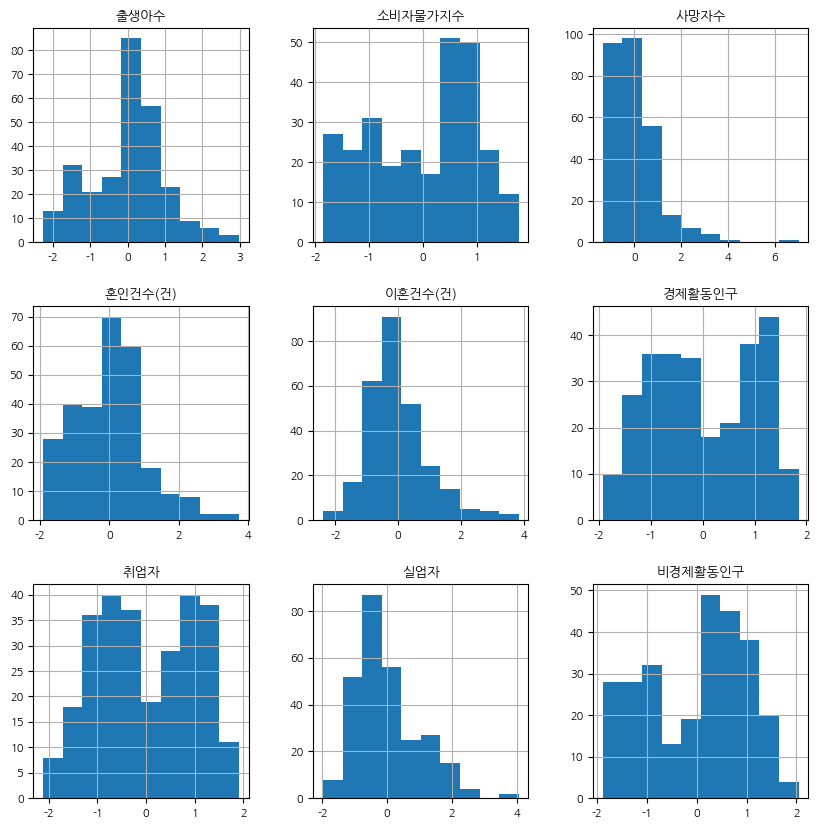

In [ ]:
multi_std.hist(figsize=[10,10])

In [ ]:
x_data = multi_std[['소비자물가지수', '사망자수', '혼인건수(건)', '이혼건수(건)', '경제활동인구','취업자','실업자', '비경제활동인구']] #변수 여러개
target = multi_std[['출생아수']]
model=sm.OLS(target, x_data).fit()

### **이상치 확인**

In [ ]:
q1 = np.percentile(multi_std, 25)
q3 = np.percentile(multi_std, 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr

In [ ]:
cleandata = multi_std[(multi_std >= outlierbelow) & (multi_std <= outlierabove)]
cleandata.dropna(inplace=True)
cleandata

,출생아수,소비자물가지수,사망자수,혼인건수(건),이혼건수(건),경제활동인구,취업자,실업자,비경제활동인구
2,2.403252,-1.837942,-0.724845,0.264915,-0.331962,-1.917167,-2.101889,1.866329,-1.020117
3,2.773273,-1.813474,-0.315232,0.999827,0.678027,-1.749782,-1.877934,1.166113,-1.342759
4,1.973419,-1.833126,-0.688534,0.610920,-0.843073,-1.609977,-1.674383,0.383889,-1.602693
5,1.907038,-1.857672,-0.866267,1.853026,0.224008,-1.499180,-1.526214,-0.070305,-1.791828
6,1.236426,-1.833126,-1.208991,0.758562,0.301490,-1.494900,-1.499009,-0.366793,-1.759462
...,...,...,...,...,...,...,...,...,...
270,-2.030897,1.701247,0.741609,-1.696122,-1.560124,1.843295,1.902576,-0.253244,0.324057
271,-1.847939,1.741639,1.112044,-1.687437,-1.594787,1.817141,1.901119,-0.581274,0.389799
272,-1.694653,1.733871,2.375603,-1.553517,-1.124456,1.681141,1.869542,-1.975398,0.692212
273,-1.678703,1.748630,2.118559,-1.722003,-1.167955,1.713477,1.859340,-1.413963,0.636584


### 보류

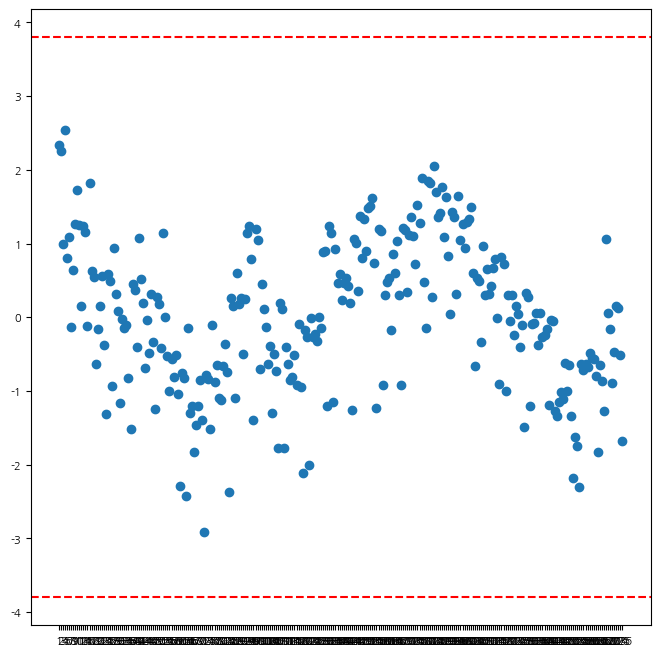

In [ ]:
## 반응변수에 대한 이상치 확인
def hat_matrix(X):
  X = np.array(X)
  XtX = np.matmul(X.transpose(),X)
  XtX_inv = np.linalg.inv(XtX)
  return np.matmul(np.matmul(X, XtX_inv),X.transpose())

n = len(x_data) ## 데이터 개수
p = len(x_data.columns) ## 절편항을 포함한 회귀 계수의 개수

hat_mat = hat_matrix(x_data)
h = np.array([hat_mat[i][i] for i in range(n)])

e = model.resid
SSE = np.sum(np.square(e)) ## 잔차제곱합
sdr = e * np.sqrt((n - p - 1) / (SSE*(1 - h) - np.square(e)))

alpha = 0.05 ## 유의수준
critical_value = t.ppf(1-alpha/(2*n), n-p-1)

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
idx = range(1,n+1)
plt.scatter(idx, sdr)
plt.axhline(critical_value,linestyle='--',color='red')
plt.axhline(-critical_value,linestyle='--',color='red')
plt.xticks(idx)
plt.show()

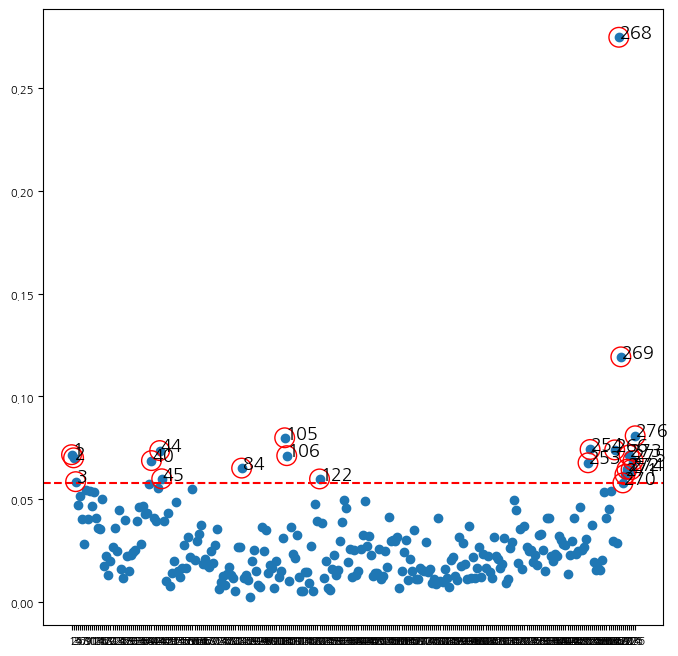

In [ ]:
# 설명 변수에 대한 이상치 확인
mean_h = p/n ##평균 레버리지

outlier_idx = np.where(h>2*mean_h)[0]
outlier = [h[i] for i in outlier_idx]

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
idx = range(1,n+1)
plt.scatter(idx, h)
plt.scatter(outlier_idx+1,outlier,s=200,facecolor='none',edgecolor='red')
for i in range(len(outlier)):
  ax.annotate(str(outlier_idx[i]+1),(outlier_idx[i]+1.5,outlier[i]),fontsize=13)
plt.axhline(2*mean_h,linestyle='--',color='red')
plt.xticks(idx)
plt.show()

### **다중 회귀분석**

In [ ]:
multi_std = sm.add_constant(cleandata)
x_train,x_test,y_train,y_test = train_test_split(multi_std.drop('출생아수',axis=1),multi_std['출생아수']) # random_state=10

model=sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   출생아수   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     67.53
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.41e-50
Time:                        14:54:28   Log-Likelihood:                -133.10
No. Observations:                 192   AIC:                             284.2
Df Residuals:                     183   BIC:                             313.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0116      0.036      0.318      0.751      -0.060       0.083
소비자물가지수        0.2948      0.333      0.884      0.378      -0.363       0.953
사망자수          -0.1503      0.073     -2.072      0.040      -0.293      -0.007
혼인건수(건)        0.1224      0.045      2.725      0.007       0.034       0.211
이혼건수(건)       -0.0745      0.066     -1.133      0.259      -0.204       0.055
경제활동인구       128.8876    137.488      0.937      0.350    -142.378     400.153
취업자         -127.2159    134.575     -0.945      0.346    -392.733     138.301
실업자           -9.7160     10.368     -0.937      0.350     -30.172      10.740
비경제활동인구        0.0441      0.150      0.295      0.768      -0.251       0.339
==============================================================================
Omnibus:                        2.200   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                2.106
Skew:                          -0.182   Prob(JB):                        0.349
Kurtosis:                       2.639   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train

In [ ]:
x_train_std = x_train[['소비자물가지수', '사망자수', '혼인건수(건)', '이혼건수(건)', '경제활동인구','취업자','실업자', '비경제활동인구']]

### **다중공선성 제거**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train_std.values, i) for i in range(x_train_std.shape[1])]
vif["features"] = x_train_std.columns
vif

,VIF Factor,features
0,8.146214e+01,소비자물가지수
1,2.463364e+00,사망자수
2,1.467311e+00,혼인건수(건)
3,2.386726e+00,이혼건수(건)
4,1.401175e+07,경제활동인구
5,1.340407e+07,취업자
6,7.419012e+04,실업자
7,1.705715e+01,비경제활동인구


In [ ]:
# 경제활동인구 변수 제거 후 vif 확인

vif = pd.DataFrame()
x_train_std = x_train_std.drop("경제활동인구",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_train_std.values, i) for i in range(x_train_std.shape[1])]
vif["features"] = x_train_std.columns
vif

,VIF Factor,features
0,81.135682,소비자물가지수
1,2.409533,사망자수
2,1.465455,혼인건수(건)
3,2.380879,이혼건수(건)
4,36.483566,취업자
5,1.420334,실업자
6,17.010262,비경제활동인구


In [ ]:
# 소비자물가지수 변수 제거 후 vif 확인

vif = pd.DataFrame()
x_train_std = x_train_std.drop("소비자물가지수",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_train_std.values, i) for i in range(x_train_std.shape[1])]
vif["features"] = x_train_std.columns
vif

,VIF Factor,features
0,2.403952,사망자수
1,1.463963,혼인건수(건)
2,2.285971,이혼건수(건)
3,3.405431,취업자
4,1.417416,실업자
5,4.167004,비경제활동인구


In [ ]:
x_train_vif = x_train_std.drop("실업자",axis=1)
x_train_vif = sm.add_constant(x_train_std)

model_vif = sm.OLS(y_train, x_train_vif).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   출생아수   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     89.85
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           3.74e-52
Time:                        16:43:25   Log-Likelihood:                -134.02
No. Observations:                 192   AIC:                             282.0
Df Residuals:                     185   BIC:                             304.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0089      0.036      0.247      0.805      -0.063       0.080
사망자수          -0.1641      0.072     -2.293      0.023      -0.305      -0.023
혼인건수(건)        0.1196      0.045      2.668      0.008       0.031       0.208
이혼건수(건)       -0.0842      0.064     -1.310      0.192      -0.211       0.043
취업자           -0.8591      0.068    -12.661      0.000      -0.993      -0.725
실업자            0.0011      0.045      0.023      0.981      -0.088       0.090
비경제활동인구        0.1596      0.074      2.164      0.032       0.014       0.305
==============================================================================
Omnibus:                        2.175   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.337   Jarque-Bera (JB):                2.138
Skew:                          -0.196   Prob(JB):                        0.343
Kurtosis:                       2.662   Cond. No.                         4.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **???**

In [ ]:
x_train_vif = x_train_vif.drop("이혼건수(건)",axis=1)

model_vif = sm.OLS(y_train, x_train_vif).fit()
model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   출생아수   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     134.5
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           6.50e-54
Time:                        14:58:17   Log-Likelihood:                -134.91
No. Observations:                 192   AIC:                             279.8
Df Residuals:                     187   BIC:                             296.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0123      0.036      0.340      0.734      -0.059       0.084
사망자수          -0.1721      0.071     -2.437      0.016      -0.312      -0.033
혼인건수(건)        0.1110      0.043      2.606      0.010       0.027       0.195
취업자           -0.8441      0.064    -13.137      0.000      -0.971      -0.717
비경제활동인구        0.2028      0.062      3.250      0.001       0.080       0.326
==============================================================================
Omnibus:                        1.783   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.767
Skew:                          -0.165   Prob(JB):                        0.413
Kurtosis:                       2.665   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **잔차의 정규성 확인**

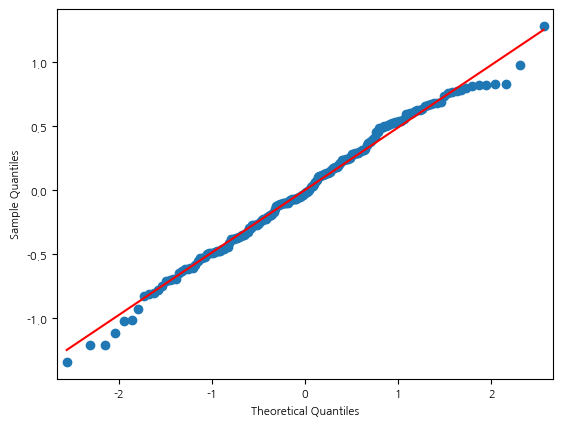

In [ ]:
residuals = model_vif.resid

# QQ Plot 생성
sm.qqplot(residuals, line='s')
plt.show()

### **평가**

In [ ]:
x_test_filtered = x_test.drop(['소비자물가지수', '이혼건수(건)', '경제활동인구', '실업자'], axis=1)

Text(0, 0.5, 'test_predict_value')

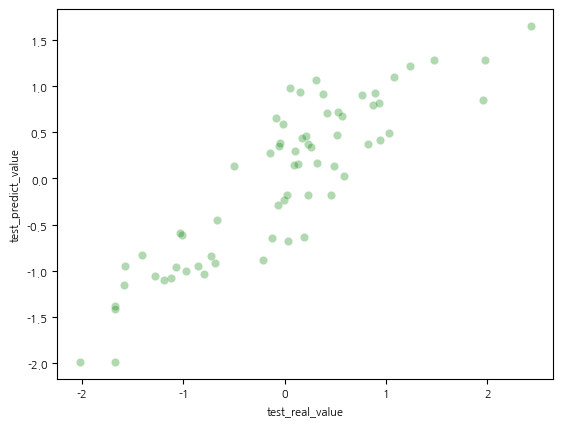

In [ ]:
sns.scatterplot(x=y_test,y=model_vif.predict(x_test_filtered),alpha=0.3,color='green')

plt.xlabel('test_real_value')
plt.ylabel('test_predict_value')

In [ ]:
from sklearn.metrics import mean_squared_error

# MSE 계산
mse = mean_squared_error(y_test, model_vif.predict(x_test_filtered))

# 결과 출력
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.19167749177946283


# **변수선택법**

In [ ]:
import time
import itertools

- 모든 가능한 회귀

In [ ]:
def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

In [ ]:
x_train_vif

,const,사망자수,혼인건수(건),이혼건수(건),취업자,실업자,비경제활동인구
175,1.0,-0.550298,0.053005,0.313724,0.834784,-0.089230,0.065134
249,1.0,0.563876,-1.621954,-0.234089,1.190391,0.453280,1.269731
194,1.0,0.643187,-0.380021,-1.233203,0.511725,2.402530,0.995637
130,1.0,-0.170625,0.960050,0.612099,-0.104271,-1.155325,0.382719
94,1.0,-0.449646,1.530297,0.726283,-0.318024,-1.205791,-0.807719
...,...,...,...,...,...,...,...
213,1.0,0.012841,-1.168778,-0.326524,1.189905,0.024319,0.487906
195,1.0,0.836527,0.057174,-0.628297,0.689043,1.418443,0.820662
254,1.0,0.383914,-1.683095,-1.443221,0.876077,2.680093,1.726892
250,1.0,0.962341,-1.126396,-0.682671,1.301639,0.245108,1.126110


In [ ]:
# x_train_contect = x_train_vif[['사망자수', '혼인건수(건)', '취업자', '비경제활동인구']]

In [ ]:
print(processSubset(X = x_train_vif, y = y_train, feature_set = x_train_vif[0:4]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b3690ad44c0>, 'AIC': 282.03981498679275}


In [ ]:
# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    for combo in itertools.combinations(x_train_vif.columns.difference(['const']), k):   # 각 변수 조합을 고려한 경우의수
      combo = (list(combo) + ['const'])        # 상수항을 추가하여 combo를 결성
      results.append(processSubset(x_train_vif, y_train, feature_set=combo))   # 모델링된것을 저장

        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함

    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")

    return best_model

print(getBest(X=x_train_vif, y = y_train, k=2))

Processed 15 models on 2 predictors in 0.04049229621887207 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                             287.544345
Name: 14, dtype: object


In [ ]:
# 변수 선택에 따른 학습시간과 저장

models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,4):
	models.loc[i] = getBest(X=x_train_vif, y=y_train,k=i)
toc = time.time()
print("Total elapsed time:",(toc-tic),"seconds.")

Processed 6 models on 1 predictors in 0.015869617462158203 seconds.
Processed 15 models on 2 predictors in 0.03537559509277344 seconds.
Processed 20 models on 3 predictors in 0.040431976318359375 seconds.
Total elapsed time: 0.10765719413757324 seconds.


In [ ]:
models

,AIC,model
1,293.900671,<statsmodels.regression.linear_model.Regressio...
2,287.544345,<statsmodels.regression.linear_model.Regressio...
3,283.494886,<statsmodels.regression.linear_model.Regressio...


In [ ]:
mmodel=models.loc[3,"model"]
mmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   출생아수   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     173.3
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           7.11e-54
Time:                        16:49:25   Log-Likelihood:                -137.75
No. Observations:                 192   AIC:                             283.5
Df Residuals:                     188   BIC:                             296.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
이혼건수(건)       -0.1398      0.057     -2.453      0.015      -0.252      -0.027
취업자           -0.8510      0.052    -16.212      0.000      -0.955      -0.747
혼인건수(건)        0.1329      0.043      3.100      0.002       0.048       0.217
const          0.0171      0.036      0.470      0.639      -0.054       0.089
==============================================================================
Omnibus:                        3.113   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.544
Skew:                          -0.164   Prob(JB):                        0.280
Kurtosis:                       2.541   Cond. No.                         2.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **잔차의 정규성 확인**

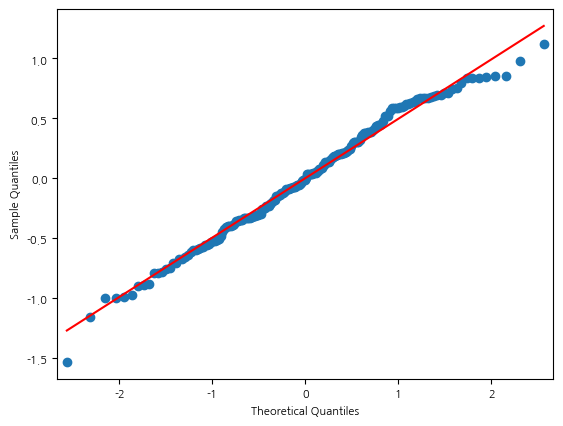

In [ ]:
residuals = mmodel.resid

# QQ Plot 생성
sm.qqplot(residuals, line='s')
plt.show()

In [ ]:
x_test

,const,소비자물가지수,사망자수,혼인건수(건),이혼건수(건),경제활동인구,취업자,실업자,비경제활동인구
131,1.0,0.073219,0.135470,2.273198,0.277701,-0.332713,-0.306365,-0.436184,0.746829
9,1.0,-1.725233,-0.764341,-1.531631,-0.295939,-1.436886,-1.457716,-0.133388,-1.748337
142,1.0,0.328232,-0.391676,1.182208,0.363340,0.062449,0.157090,-1.218407,0.387776
257,1.0,1.222758,0.950875,-1.477959,-0.975608,1.525644,1.451752,1.386902,0.798411
111,1.0,-0.207272,-0.495513,0.200648,0.461212,-0.586644,-0.615335,0.207258,0.344285
...,...,...,...,...,...,...,...,...,...
4,1.0,-1.833126,-0.688534,0.610920,-0.843073,-1.609977,-1.674383,0.383889,-1.602693
225,1.0,1.080687,0.103300,-1.792176,-1.396324,1.231293,1.211280,0.604678,0.603208
256,1.0,1.217320,0.792890,-1.528678,-0.571885,1.365391,1.288523,1.380593,1.118019
90,1.0,-0.658109,-1.102288,0.506007,-0.051938,-0.374560,-0.311709,-0.921919,-1.126315


### **평가**

In [ ]:
x_test_filtered = x_test.drop(['소비자물가지수', '사망자수', '비경제활동인구', '경제활동인구', '실업자'], axis=1)

Text(0, 0.5, 'test_predict_value')

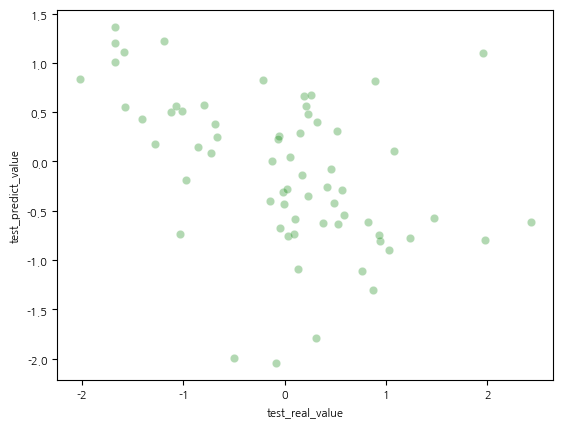

In [ ]:
sns.scatterplot(x=y_test,y=mmodel.predict(x_test_filtered),alpha=0.3,color='green')

plt.xlabel('test_real_value')
plt.ylabel('test_predict_value')

In [ ]:
from sklearn.metrics import mean_squared_error

# MSE 계산
mse = mean_squared_error(y_test, mmodel.predict(x_test_filtered))

# 결과 출력
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2.148395342852449
